In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("ca94.csv.gz",compression='gzip')
df.authorship.value_counts().head(30)

PER CURIAM              1470
PHILLIPS                1174
McKAY                   1063
SEYMOUR                  964
EBEL                     947
WADE BRORBY              942
Mary Beck Briscoe        856
SETH                     845
LOGAN                    844
Carlos F. Lucero         843
MURRAH                   840
BRATTON                  825
TACHA                    821
BARRETT                  786
HOLLOWAY                 744
BALDOCK                  733
Michael R. Murphy        709
Stephen H. Anderson      700
LEWIS                    695
BREITENSTEIN             688
Harris L Hartz           684
McWILLIAMS               682
Timothy M. Tymkovich     649
HUXMAN                   644
STEPHEN H. ANDERSON      640
KELLY                    632
Terrence L. O'Brien      612
BRORBY                   611
Monroe G. McKay          605
DOYLE                    601
Name: authorship, dtype: int64

In [4]:
df.authorship = df.authorship.str.upper()
names = []
for i in df.authorship.value_counts().head(30).index:
    if i != 'PER CURIAM' and i != 'PER CURIAM:':
        names.append(i)
copy = pd.DataFrame()
temp = df[df.word_count > 50]
for name in names:
    copy = copy.append(temp[temp.authorship == name])
copy.date_standard = copy.date_standard.str[:4]
copy.date_standard = copy.date_standard.astype(int)
copy = copy.drop(columns=['opinion_type','opinion_id','word_count','authors','dc_source','judges_refined'])
copy

,dc_identifier,opinion,authorship,date_standard
95,41K1-XWX0-0038-X10K-00000-00,ORDER AND JUDGMENT*This order and judgment is ...,STEPHEN H. ANDERSON,2000
109,803B-7YB1-2RHT-1009-00000-00,ORDER AND JUDGMENT*This order and judgment is ...,STEPHEN H. ANDERSON,2010
133,591P-6WG1-F04K-W000-00000-00,ORDER AND JUDGMENT*After examining the briefs ...,STEPHEN H. ANDERSON,2013
141,4T3V-H500-TXFX-F2B7-00000-00,ORDER AND JUDGMENT*After examining the briefs ...,STEPHEN H. ANDERSON,2008
142,3RWF-7N70-00B1-D4TH-00000-00,ORDER AND JUDGMENT * This order and judgment i...,STEPHEN H. ANDERSON,1997
...,...,...,...,...
47817,3S4W-Y2G0-006F-M53N-00000-00,ORDER AND JUDGMENT*This order and judgment is ...,ROBERT H. HENRY,1996
47973,3S4W-Y2G0-006F-M53P-00000-00,ORDER AND JUDGMENT*This order and judgment is ...,ROBERT H. HENRY,1996
48013,42N1-63X0-0038-X19T-00000-00,ORDER AND JUDGMENT *This order and judgment is...,ROBERT H. HENRY,2001
48036,3S22-8JJ0-0038-X4BC-00000-00,ORDER AND JUDGMENT *After examining the briefs...,ROBERT H. HENRY,1998


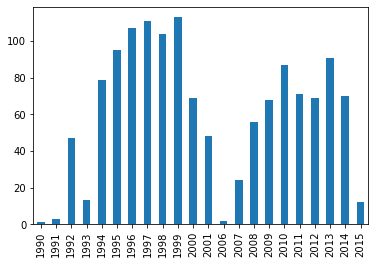

In [5]:
copy[copy.authorship == names[0]].date_standard.value_counts().sort_index().plot(kind='bar')

In [6]:
copy.opinion = copy.opinion.str.replace('Senior Circuit Judge','')
copy.opinion = copy.opinion.str.replace('Senior Circuit Judge'.upper(),'')
copy.opinion = copy.opinion.str.replace('Senior District Judge','')
copy.opinion = copy.opinion.str.replace('Senior District Judge'.upper(),'')
copy.opinion = copy.opinion.str.replace('Circuit Judges','')
copy.opinion = copy.opinion.str.replace('CIRCUIT JUDGES','')
copy.opinion = copy.opinion.str.replace('District Judges','')
copy.opinion = copy.opinion.str.replace('District Judges'.upper(),'')
copy.opinion = copy.opinion.str.replace('District Judge','')
copy.opinion = copy.opinion.str.replace('District Judge'.upper(),'')
copy.opinion = copy.opinion.str.replace('Circuit Judge','')
copy.opinion = copy.opinion.str.replace('CIRCUIT JUDGE','')
copy.opinion = copy.opinion.str.replace('Circuit Justice','')
copy.opinion = copy.opinion.str.replace('Circuit Justice'.upper(),'')
copy.opinion = copy.opinion.str.replace('D\.J\.','')
copy.opinion = copy.opinion.str.replace('D\. J\.','')
copy.opinion = copy.opinion.str.replace('C\.J\.','')
copy.opinion = copy.opinion.str.replace('C\. J\.','')
copy.opinion = copy.opinion.str.replace('Senior Judge','')
copy.opinion = copy.opinion.str.replace('Senior Judge'.upper(),'')
copy.opinion = copy.opinion.str.replace('Associate Justice','')
copy.opinion = copy.opinion.str.replace('Associate Justice'.upper(),'')
copy.opinion = copy.opinion.str.replace('Chief Judge','')
copy.opinion = copy.opinion.str.replace('Chief Judge'.upper(),'')
copy.opinion = copy.opinion.str.replace('Judge','')
copy.opinion = copy.opinion.str.replace('Judge'.upper(),'')
copy.opinion = copy.opinion.str.replace('HONORABLE','')

for name in names:
    copy.opinion = copy.opinion.str.replace(name.upper(),'')
    copy.opinion = copy.opinion.str.replace(name,'')
    copy.opinion = copy.opinion.str.replace(name[:1].upper()+name[1:].lower(),'')




copy.opinion = copy.opinion.str.replace('ORIE',' ')
copy.opinion = copy.opinion.str.replace('Orie',' ')
copy.opinion = copy.opinion.str.replace('McKAY',' ')
copy.opinion = copy.opinion.str.replace('McKay',' ')
copy.opinion = copy.opinion.str.replace('McWILLIAMS',' ')
copy.opinion = copy.opinion.str.replace('McWiliams',' ')
copy.opinion = copy.opinion.str.replace('DAVID',' ')
copy.opinion = copy.opinion.str.replace('David',' ')
copy.opinion = copy.opinion.str.replace('\n',' ')

In [7]:
copy.opinion = copy.opinion.str.replace('\\\'','')
copy.opinion = copy.opinion.str.replace('(','')
copy.opinion = copy.opinion.str.replace(')','')
copy.opinion = copy.opinion.apply(lambda x: re.sub(r"\s\w\.", "", x))
copy.opinion = copy.opinion.apply(lambda x: re.sub(r"\s\.\s", " ", x))
copy.opinion = copy.opinion.apply(lambda x: re.sub(r"\s\.\s", " ", x))
copy.opinion = copy.opinion.apply(lambda x: re.sub(r"\s\,", ",", x))
copy.opinion = copy.opinion.apply(lambda x: re.sub(r"\d+", "", x))
copy.opinion = copy.opinion.apply(lambda x: re.sub(r"-", "", x))
copy.opinion = copy.opinion.str.replace('S\.C\.','')
copy.opinion = copy.opinion.str.replace('Ct\.','Ct')
copy.opinion = copy.opinion.str.replace('Ed\.','Ed')
copy.opinion = copy.opinion.str.replace('Dec\.','Dec')
copy.opinion = copy.opinion.str.replace(' No\.',' No')
copy.opinion = copy.opinion.str.replace(' pt\.',' pt')
copy.opinion = copy.opinion.str.replace(' Rep\.',' Rep')
copy.opinion = copy.opinion.str.replace(' Tr\.',' Tr')
copy.opinion = copy.opinion.str.replace(' Arg\.',' Arg')
copy.opinion = copy.opinion.str.replace(' Nev\.',' Nev')
copy.opinion = copy.opinion.str.replace(' Rev\.',' Rev')
copy.opinion = copy.opinion.str.replace(' Stat\.',' Stat')
copy.opinion = copy.opinion.str.replace(' Cent\.',' Cent')
copy.opinion = copy.opinion.str.replace(' Ore\.',' Ore')
copy.opinion = copy.opinion.str.replace(' Co\.',' Co')
copy.opinion = copy.opinion.str.replace(' Ins\.',' Ins')
copy.opinion = copy.opinion.str.replace('S\.','')
copy.opinion = copy.opinion.str.replace('Cf\.','Cf')
copy.opinion = copy.opinion.str.replace('Id\.','Id')
copy.opinion = copy.opinion.str.replace(' ,',',')
copy.opinion = copy.opinion.str.replace(' \.','.')
copy.opinion = copy.opinion.str.replace('§','')
copy.opinion = copy.opinion.str.replace('$','')
copy.opinion = copy.opinion.str.replace('\.\.','.')
copy.opinion = copy.opinion.str.replace('\.\.','.')
copy.opinion = copy.opinion.str.replace(',,',',')
copy.opinion = copy.opinion.str.replace(',,',',')
copy.opinion = copy.opinion.str.replace(',\.',',')
copy.opinion = copy.opinion.str.replace('"',' ')
copy.opinion = copy.opinion.str.replace('II','')
copy.opinion = copy.opinion.str.replace('III','')
copy.opinion = copy.opinion.str.replace('  ',' ')

In [8]:
# Prints the first 200 characters of the first 10 cleaned opinion texts of a given judge.
judge = 0
print(names[judge]+'\n')
for x in range(10):
    print(copy.opinion[copy.loc[copy.authorship==names[judge]].index[x]][:200]+'\n\n')

STEPHEN H. ANDERSON

ORDER AND JUDGMENT*This order and judgment is not binding precedent, except under the doctrines of law of the case, res judicata, and collateral estoppel. The court generally disfavors the citation of


ORDER AND JUDGMENT*This order and judgment is not binding precedent except under the doctrines of law of the case, res judicata, and collateral estoppel. It may be cited, however, for its persuasive v


ORDER AND JUDGMENT*After examining the briefs and appellate record, this panel has determined unanimously to grant the parties request for a decision on the briefs without oral argument. SeeFed. App. 


ORDER AND JUDGMENT*After examining the briefs and appellate record, this panel has determined unanimously to grant the parties request for a decision on the briefs without oral argument. SeeFed. App. 


ORDER AND JUDGMENT * This order and judgment is not binding precedent, except under the doctrines of law of the case, res judicata, and collateral estoppel. The court 

In [30]:
#get rough estimate for total number of top 10 authors in all 3 splits
top = 2000
bot = 1970
split1 = pd.DataFrame()
for x in copy[copy.date_standard<=bot].authorship.value_counts().head(10).index:
    temp = copy[copy.authorship == x]
    split1 = split1.append(temp[temp.date_standard<=bot])
split2 = pd.DataFrame()
for x in copy[copy.date_standard<top][copy.date_standard>bot].authorship.value_counts().head(10).index:
    temp = copy[copy.authorship == x]
    split2 = split2.append(temp[temp.date_standard<top][temp.date_standard>bot])
split3 = pd.DataFrame()
for x in copy[copy.date_standard>=top].authorship.value_counts().head(10).index:
    temp = copy[copy.authorship == x]
    split3 = split3.append(temp[temp.date_standard>=top])

for i in range(3):
    totalNum = split1.shape[0]+split2.shape[0]+split3.shape[0]
    print('totalNum = '+str(totalNum))
    print(split1.shape)
    print(split2.shape)
    print(split3.shape)    

    #initialize the splits so we can iterate over them
    top = 2020
    bot = 1800
    split1 = pd.DataFrame()
    for x in copy[copy.date_standard<=bot].authorship.value_counts().head(10).index:
        temp = copy[copy.authorship == x]
        split1 = split1.append(temp[temp.date_standard<=bot])
    split2 = pd.DataFrame()
    for x in copy[copy.date_standard<top][copy.date_standard>bot].authorship.value_counts().head(10).index:
        temp = copy[copy.authorship == x]
        split2 = split2.append(temp[temp.date_standard<top][temp.date_standard>bot])
    split3 = pd.DataFrame()
    for x in copy[copy.date_standard>=top].authorship.value_counts().head(10).index:
        temp = copy[copy.authorship == x]
        split3 = split3.append(temp[temp.date_standard>=top])
    
    
    
    
    #loop to iterate 
    while split1.shape[0] < totalNum/3:
        bot += 1
        split1 = pd.DataFrame()
        for x in copy[copy.date_standard<=bot].authorship.value_counts().head(10).index:
            temp = copy[copy.authorship == x]
            split1 = split1.append(temp[temp.date_standard<=bot])    
    while split3.shape[0] < totalNum/3:
        top -= 1
        split3 = pd.DataFrame()
        for x in copy[copy.date_standard>=top].authorship.value_counts().head(10).index:
            temp = copy[copy.authorship == x]
            split3 = split3.append(temp[temp.date_standard>=top])
    split2 = pd.DataFrame()
    for x in copy[copy.date_standard<top][copy.date_standard>bot].authorship.value_counts().head(10).index:
        temp = copy[copy.authorship == x]
        split2 = split2.append(temp[temp.date_standard<top][temp.date_standard>bot])
    

    print(split1.shape)
    print(split2.shape)
    print(split3.shape)
    print('top = '+str(top)+' bot = '+str(bot))

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


totalNum = 17915
(4515, 4)
(6891, 4)
(6509, 4)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(6090, 4)
(5967, 4)
(6509, 4)
top = 2000 bot = 1980
totalNum = 18566
(6090, 4)
(5967, 4)
(6509, 4)
(6214, 4)
(5836, 4)
(6509, 4)
top = 2000 bot = 1981
totalNum = 18559
(6214, 4)
(5836, 4)
(6509, 4)
(6214, 4)
(5836, 4)
(6509, 4)
top = 2000 bot = 1981


# Bag of Words approach

## Split 1

In [10]:
split1.authorship.value_counts()

PHILLIPS        1087
MURRAH           834
BRATTON          802
LEWIS            694
HUXMAN           637
BREITENSTEIN     617
SETH             575
MCWILLIAMS       378
BARRETT          371
HOLLOWAY         219
Name: authorship, dtype: int64

In [11]:
print('Number of Datapoints: ', split1.shape[0])

Number of Datapoints:  6214


In [12]:
split1names = split1.authorship.unique()

for index, name in enumerate(split1names):
    split1.authorship = split1.authorship.str.replace(name, str(index))
split1.authorship = split1.authorship.astype(int)

In [13]:
vectorizer1 = CountVectorizer(lowercase=False, ngram_range=(1,3), min_df=30, max_features=3000)
bowM1 = vectorizer1.fit_transform(split1.opinion)
#print(bowM1.toarray().shape)
#print(vectorizer1.get_feature_names())

In [14]:
X1 = pd.DataFrame.sparse.from_spmatrix(bowM1)
X1 = X1.sparse.to_dense()

In [15]:
for x in range(0,len(X1.columns)):
    mean = X1.iloc[:,x].mean()
    std = X1.iloc[:,x].std()
    X1.iloc[:,x] = (X1.iloc[:,x] - mean)/std

In [16]:
Y1 = split1.authorship.to_frame().reset_index().drop(columns=['index'])

X1_Training, X1_Testing, y1_Training, y1_Testing = train_test_split(X1, Y1, test_size=0.2, random_state=1234)

In [17]:
scores = [0,0,0,0,0]

for i in range(0,5):
    classifier = svm.SVC(kernel='poly',degree=1,C=1,class_weight='balanced', verbose=True, probability=True)

    X1_train, X1_test, y1_train, y1_test = train_test_split(X1_Training, y1_Training, test_size=0.2, random_state=i)
    classifier.fit(np.array(X1_train), np.array(y1_train))
    values = classifier.predict_proba(np.array(X1_test))
    
    correct = 0
    counter = 0
    for k in range(0,y1_test.size):
        if np.amax(values[k]) == values[k][int(y1_test.iloc[k])]:
            correct += 1
        counter += 1
        
    scores[i] = correct/counter
    print(scores[i])
    
print('Accuracy: ', np.array(scores).mean(), ' +/- ', np.array(scores).std())

C:\Users\nicol\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]0.9266331658291457


C:\Users\nicol\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]0.9336683417085427


C:\Users\nicol\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]0.9206030150753769


C:\Users\nicol\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]0.9256281407035176


C:\Users\nicol\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]0.9346733668341709
Accuracy:  0.9282412060301508  +/-  0.005264643559279931


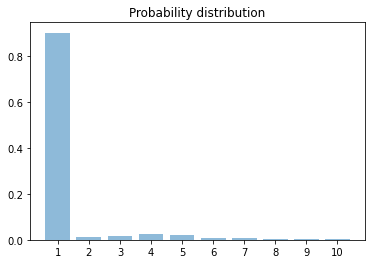

Accuracy:  0.9332260659694288


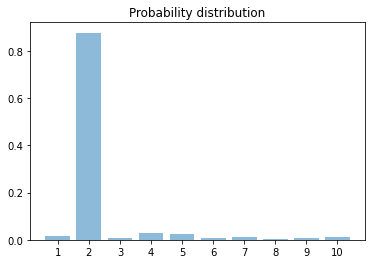

Accuracy:  0.9332260659694288


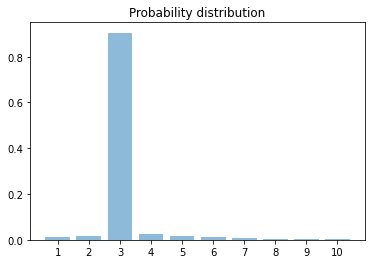

Accuracy:  0.9332260659694288


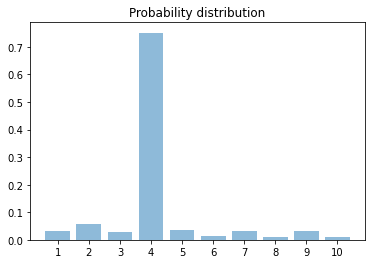

Accuracy:  0.9332260659694288


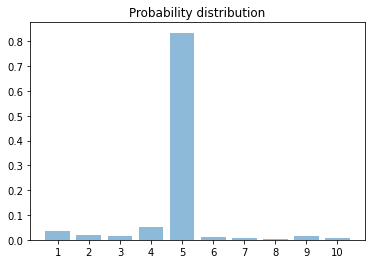

Accuracy:  0.9332260659694288


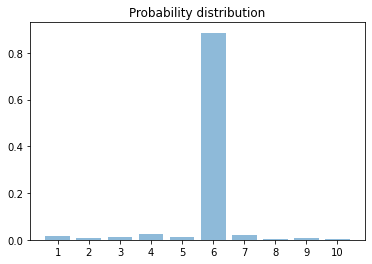

Accuracy:  0.9332260659694288


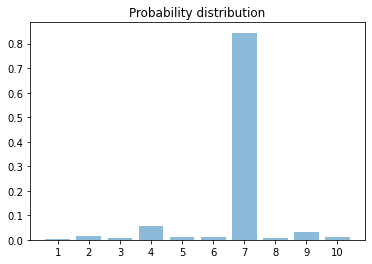

Accuracy:  0.9332260659694288


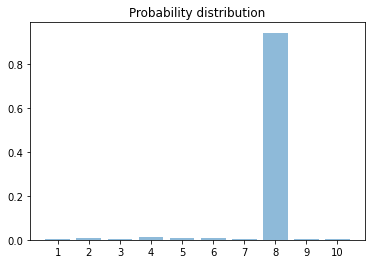

Accuracy:  0.9332260659694288


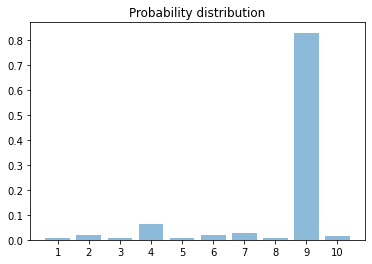

Accuracy:  0.9332260659694288


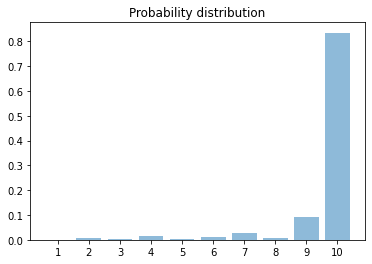

Accuracy:  0.9332260659694288


In [18]:
values1 = classifier.predict_proba(np.array(X1_Testing))
data1 = pd.DataFrame(data=values1)
data1['Y'] = y1_Testing.authorship.to_frame().reset_index().drop(columns=['index'])
data1.to_csv('94_split1_results.csv', index=False)

for l in range(0,10):
    probs = [0,0,0,0,0,0,0,0,0,0]
    count = 0

    for i,row in data1.iterrows():
        if(row['Y'] == l):
            for k in range(0,10):
                probs[k] += row[k]
            count += 1
    
    for k in range(0,10):
        probs[k] = probs[k]/count

    objects = ('1','2','3','4','5','6','7','8','9','10')
    y_pos = np.arange(len(objects))
    performance = probs

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title('Probability distribution')

    plt.show()
    
    correct = 0
    counter = 0
    for k in range(0,y1_Testing.size):
        if np.amax(values1[k]) == values1[k][int(y1_Testing.iloc[k])]:
            correct += 1
        counter += 1
        
    print('Accuracy: ',correct/counter)

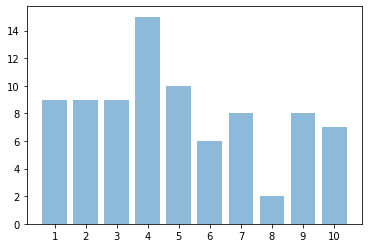

[9, 9, 9, 15, 10, 6, 8, 2, 8, 7]


In [19]:
wrongPredictions = [0,0,0,0,0,0,0,0,0,0]

for i,row in data1.iterrows():
    if row[int(row['Y'])] != np.amax(row[:10]):
        wrongPredictions[(int(row['Y']))] += 1
        #print(i)
        
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = wrongPredictions

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

print(wrongPredictions)

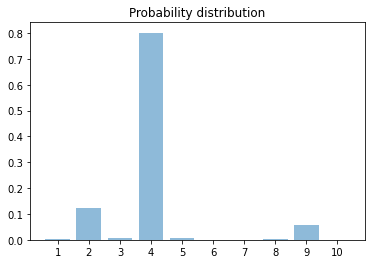

In [20]:
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = values1[233]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Probability distribution')

plt.show()

## Split 2

In [31]:
split2.authorship.value_counts()

LOGAN                  676
STEPHEN H. ANDERSON    673
WADE BRORBY            663
SEYMOUR                629
MCKAY                  628
TACHA                  545
DEANELL REECE TACHA    522
DAVID M. EBEL          511
BOBBY R. BALDOCK       499
BALDOCK                490
Name: authorship, dtype: int64

In [32]:
print('Number of Datapoints: ', split2.shape[0])

Number of Datapoints:  5836


In [33]:
split2

,dc_identifier,opinion,authorship,date_standard
844,3S4X-71C0-003B-529N-00000-00,", Allen appeals his conviction on charges of ...",LOGAN,1990
885,3RTX-3SR0-006F-M3DB-00000-00,", Defendant Robert Lee Willis appeals followin...",LOGAN,1996
1796,3S4W-WV90-003B-G3FG-00000-00,", The Secretary of Labor brings this action t...",LOGAN,1984
2136,3S4X-BB10-0039-P06S-00000-00,", Carl Emmitt Prichard appeals his conviction...",LOGAN,1986
2871,3S4X-FVP0-003B-P4K6-00000-00,ORDER AND JUDGMENT * This order and judgment h...,LOGAN,1993
...,...,...,...,...
49153,3S4X-DFM0-0039-P481-00000-00,", This is an appeal from an order of the dist...",BALDOCK,1985
49805,3S4X-DJD0-0039-P4DB-00000-00,"Before, Chief, and, *United States District Co...",BALDOCK,1985
52059,3XW3-DXF0-0038-X1M0-00000-00,", Plaintiff Stephen Thomas Taylor sued his for...",BALDOCK,1999
53440,3RHB-X5H0-001T-D00M-00000-00,", Defendants Milton Edwards, William Lawrence,...",BALDOCK,1995


In [52]:
split2names = split2.authorship.unique()


for index, name in enumerate(split2names):
    split2.authorship = split2.authorship.str.replace(name, str(index))

split2.authorship.value_counts()

0    676
1    673
2    663
3    629
4    628
5    545
6    522
7    511
8    499
9    490
Name: authorship, dtype: int64

In [50]:
split2names

array(['LOGAN', 'STEPHEN H. ANDERSON', 'WADE BRORBY', 'SEYMOUR', 'MCKAY',
       'TACHA', 'DEANELL REECE TACHA', 'DAVID M. EBEL',
       'BOBBY R. BALDOCK', 'BALDOCK'], dtype=object)

In [49]:
for i,row in split2.iterrows():
    if (row.authorship not in ['0','1','2','3','4','5','6','7','8','9']):
        print(row.authorship)

DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL REECE 5
DEANELL 

In [ ]:
vectorizer2 = CountVectorizer(lowercase=False, ngram_range=(1,3), min_df=30, max_features=3000)
bowM2 = vectorizer2.fit_transform(split2.opinion)
#print(bowM2.toarray().shape)
#print(vectorizer2.get_feature_names())

In [ ]:
X2 = pd.DataFrame.sparse.from_spmatrix(bowM2)
X2 = X2.sparse.to_dense()

In [ ]:
for x in range(0,len(X2.columns)):
    mean = X2.iloc[:,x].mean()
    std = X2.iloc[:,x].std()
    X2.iloc[:,x] = (X2.iloc[:,x] - mean)/std

In [26]:
Y2 = split2.authorship.to_frame().reset_index().drop(columns=['index'])

X2_Training, X2_Testing, y2_Training, y2_Testing = train_test_split(X2, Y2, test_size=0.2, random_state=1234)

In [27]:
scores = [0,0,0,0,0]

for i in range(0,5):
    classifier = svm.SVC(kernel='poly',degree=1,C=1,class_weight='balanced', verbose=True, probability=True)

    X2_train, X2_test, y2_train, y2_test = train_test_split(X2_Training, y2_Training, test_size=0.2, random_state=i)
    classifier.fit(np.array(X2_train), np.array(y2_train))
    values = classifier.predict_proba(np.array(X2_test))
    
    correct = 0
    counter = 0
    for k in range(0,y2_test.size):
        if np.amax(values[k]) == values[k][int(y2_test.iloc[k])]:
            correct += 1
        counter += 1
        
    scores[i] = correct/counter
    print(scores[i])
    
print('Accuracy: ', np.array(scores).mean(), ' +/- ', np.array(scores).std())

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]0.7721153846153846
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7778846153846154
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7721153846153846
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7807692307692308
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7644230769230769
Accuracy:  0.7734615384615384  +/-  0.005626438014741475


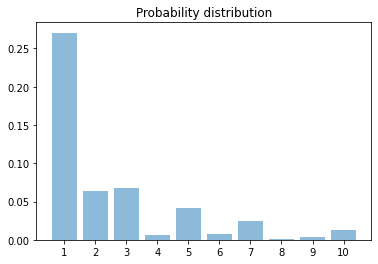

Accuracy:  0.7517294388931591


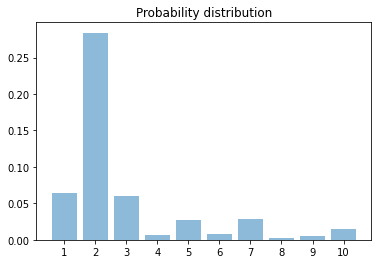

Accuracy:  0.7517294388931591


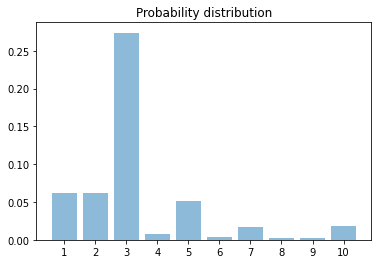

Accuracy:  0.7517294388931591


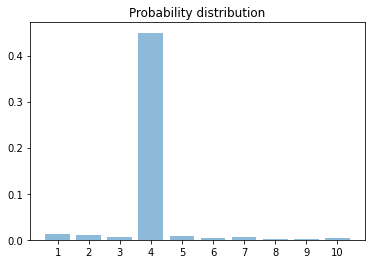

Accuracy:  0.7517294388931591


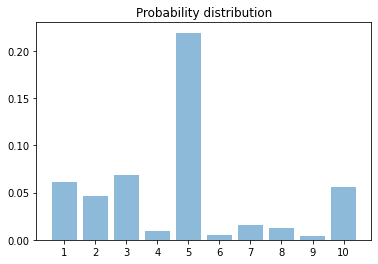

Accuracy:  0.7517294388931591


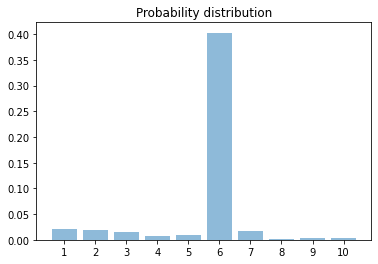

Accuracy:  0.7517294388931591


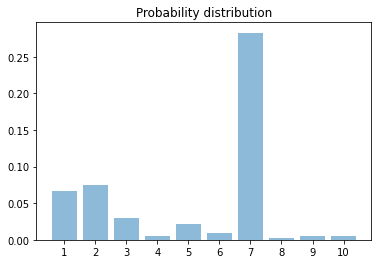

Accuracy:  0.7517294388931591


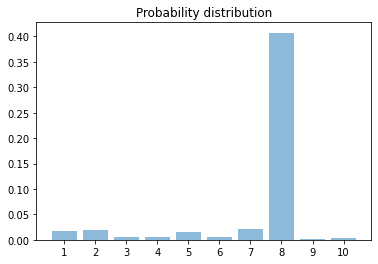

Accuracy:  0.7517294388931591


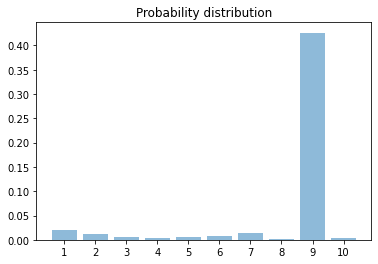

Accuracy:  0.7517294388931591


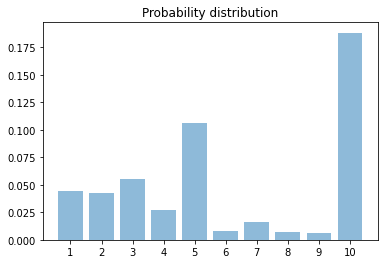

Accuracy:  0.7517294388931591


In [28]:
values2 = classifier.predict_proba(np.array(X2_Testing))
data2 = pd.DataFrame(data=values2)
data2['Y'] = y2_Testing.authorship.to_frame().reset_index().drop(columns=['index'])
data2.to_csv('94_split2_results.csv', index=False)

for l in range(0,10):
    probs = [0,0,0,0,0,0,0,0,0,0]
    count = 0

    for i,row in data2.iterrows():
        if(row['Y'] == l):
            count += 1
            for k in range(0,10):
                probs[k] += row[k]
            count += 1

    for k in range(0,10):
        probs[k] = probs[k]/count

    objects = ('1','2','3','4','5','6','7','8','9','10')
    y_pos = np.arange(len(objects))
    performance = probs

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title('Probability distribution')

    plt.show()
    
    correct = 0
    counter = 0
    for k in range(0,y2_Testing.size):
        if np.amax(values2[k]) == values2[k][int(y2_Testing.iloc[k])]:
            correct += 1
        counter += 1
        
    print('Accuracy: ',correct/counter)

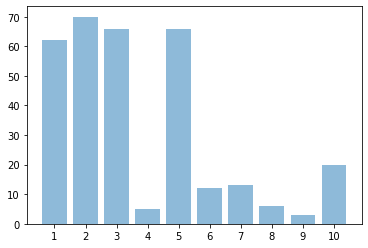

[62, 70, 66, 5, 66, 12, 13, 6, 3, 20]


In [29]:
wrongPredictions = [0,0,0,0,0,0,0,0,0,0]

for i,row in data2.iterrows():
    if row[int(row['Y'])] != np.amax(row[:10]):
        wrongPredictions[(int(row['Y']))] += 1
        #print(i)
        
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = wrongPredictions

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

print(wrongPredictions)

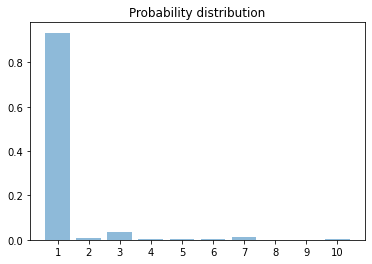

In [30]:
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = values2[233]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Probability distribution')

plt.show()

## Split 3

In [31]:
split3.authorship.value_counts()

LYNCH        1025
TORRUELLA     841
SELYA         819
LIPEZ         691
HOWARD        516
BOUDIN        488
STAHL         361
THOMPSON      271
KAYATTA       180
BARRON        139
Name: authorship, dtype: int64

In [32]:
print('Number of Datapoints: ', split3.shape[0])

Number of Datapoints:  5331


In [33]:
split3names = split3.authorship.unique()

for index, name in enumerate(split3names):
    split3.authorship = split3.authorship.str.replace(name, str(index))
split3.authorship = split3.authorship.astype(int)

In [34]:
vectorizer3 = CountVectorizer(lowercase=False, ngram_range=(1,3), min_df=30, max_features=3000)
bowM3 = vectorizer3.fit_transform(split3.opinion)
#print(bowM3.toarray().shape)
#print(vectorizer3.get_feature_names())

In [35]:
X3 = pd.DataFrame.sparse.from_spmatrix(bowM3)
X3 = X3.sparse.to_dense()

In [36]:
for x in range(0,len(X3.columns)):
    mean = X3.iloc[:,x].mean()
    std = X3.iloc[:,x].std()
    X3.iloc[:,x] = (X3.iloc[:,x] - mean)/std

In [37]:
Y3 = split3.authorship.to_frame().reset_index().drop(columns=['index'])

X3_Training, X3_Testing, y3_Training, y3_Testing = train_test_split(X3, Y3, test_size=0.2, random_state=1234)

In [38]:
scores = [0,0,0,0,0]

for i in range(0,5):
    classifier = svm.SVC(kernel='poly',degree=1,C=1,class_weight='balanced', verbose=True, probability=True)

    X3_train, X3_test, y3_train, y3_test = train_test_split(X3_Training, y3_Training, test_size=0.2, random_state=i)
    classifier.fit(np.array(X3_train), np.array(y3_train))
    values = classifier.predict_proba(np.array(X3_test))
    
    correct = 0
    counter = 0
    for k in range(0,y3_test.size):
        if np.amax(values[k]) == values[k][int(y3_test.iloc[k])]:
            correct += 1
        counter += 1
        
    scores[i] = correct/counter
    print(scores[i])
    
print('Accuracy: ', np.array(scores).mean(), ' +/- ', np.array(scores).std())

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]0.7655334114888629
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7831184056271981
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7702227432590856
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7995310668229777
[LibSVM]

/home/nicolas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7549824150058617
Accuracy:  0.7746776084407971  +/-  0.015364271911283327


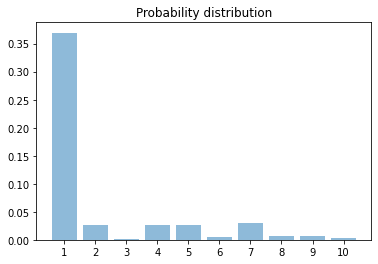

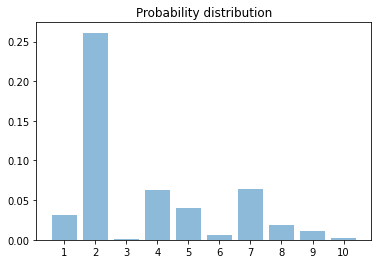

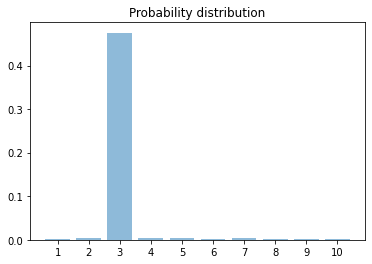

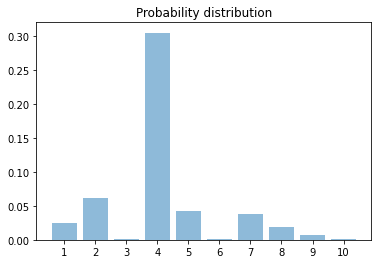

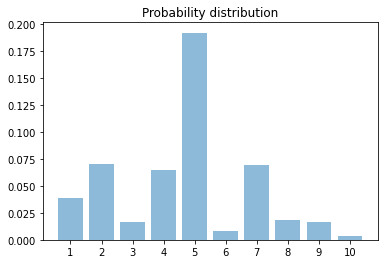

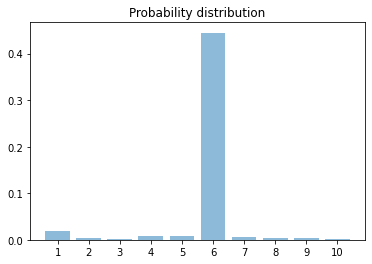

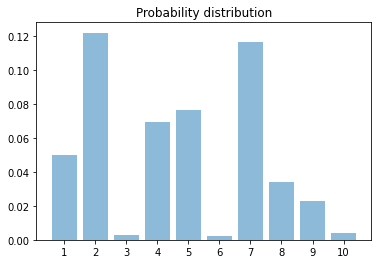

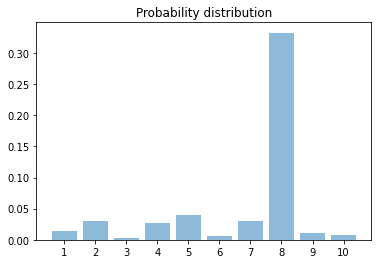

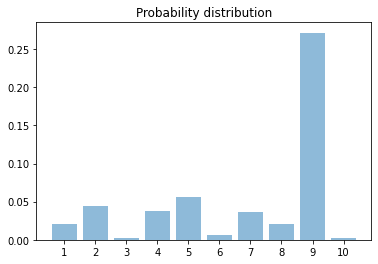

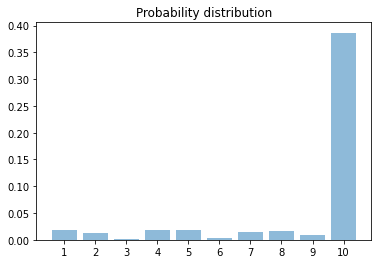

In [39]:
values3 = classifier.predict_proba(np.array(X3_Testing))
data3 = pd.DataFrame(data=values3)
data3['Y'] = y3_Testing.authorship.to_frame().reset_index().drop(columns=['index'])
data3.to_csv('94_split3_results.csv', index=False)

for l in range(0,10):
    probs = [0,0,0,0,0,0,0,0,0,0]
    count = 0

    for i,row in data3.iterrows():
        if(row['Y'] == l):
            count += 1
            for k in range(0,10):
                probs[k] += row[k]
            count += 1

    for k in range(0,10):
        probs[k] = probs[k]/count

    objects = ('1','2','3','4','5','6','7','8','9','10')
    y_pos = np.arange(len(objects))
    performance = probs

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title('Probability distribution')

    plt.show()

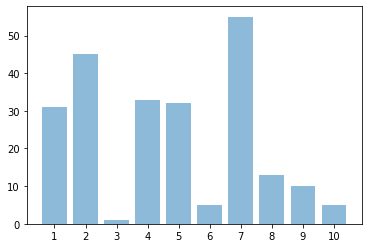

[31, 45, 1, 33, 32, 5, 55, 13, 10, 5]


In [40]:
wrongPredictions = [0,0,0,0,0,0,0,0,0,0]

for i,row in data3.iterrows():
    if row[int(row['Y'])] != np.amax(row[:10]):
        wrongPredictions[(int(row['Y']))] += 1
        #print(i)
        
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = wrongPredictions

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

print(wrongPredictions)

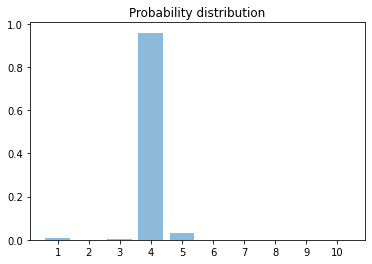

In [41]:
objects = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(objects))
performance = values3[233]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Probability distribution')

plt.show()